# Logistic Regression and other models

My intention here is to evaluate the data with logistic regression, svm and deep nn

In [1]:
#importing the libraries
import pandas as pd
import numpy as np

Loading data

In [2]:
#I am using the bank-additional-full dataset!
df = pd.read_csv('df_onehot_norm.csv',delimiter=';')
df.head()

,Unnamed: 0,age,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,...,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,0.481481,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
1,1,0.493827,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
2,2,0.246914,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
3,3,0.283951,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
4,4,0.481481,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0


Dropping a very rare column that appears here

In [3]:
df = df.drop(['Unnamed: 0','duration'], axis='columns')
df.head()

,age,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,...,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.481481,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
1,0.493827,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
2,0.246914,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
3,0.283951,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
4,0.481481,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0


Showing the columns name and type

In [4]:
df.dtypes

age               float64
job_1             float64
job_2             float64
job_3             float64
job_4             float64
job_5             float64
job_6             float64
job_7             float64
job_8             float64
job_9             float64
job_10            float64
job_11            float64
marital_1         float64
marital_2         float64
marital_3         float64
education_1       float64
education_2       float64
education_3       float64
education_4       float64
education_5       float64
education_6       float64
education_7       float64
default_1         float64
default_2         float64
housing_1         float64
housing_2         float64
loan_1            float64
loan_2            float64
poutcome_1        float64
poutcome_2        float64
contact           float64
day_of_week_1     float64
day_of_week_2     float64
day_of_week_3     float64
day_of_week_4     float64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m   

Everything is float which is good because everything should be normalized

Now let's verify if data is balanced

In [5]:
from collections import Counter

print('Original dataset shape {}'.format(Counter(df['y'])))

Original dataset shape Counter({0.0: 36548, 1.0: 4640})


Unfortunately it is not

# Train test split

Let's split the data into two sets. I will do and after I will resampling this data.

In [6]:
from sklearn.model_selection import cross_val_score, train_test_split

#features names:
features = list(df.columns[:-1])

X_train, X_test, y_train, y_test = train_test_split(df[features], df['y'], test_size=0.2)

Now let's see the proportions

In [7]:
print('Train shape {}'.format(Counter(y_train)))
print('Test  shape {}'.format(Counter(y_test)))

Train shape Counter({0.0: 29262, 1.0: 3688})
Test  shape Counter({0.0: 7286, 1.0: 952})


# Resampling

In [9]:
from imblearn.under_sampling import EditedNearestNeighbours, RandomUnderSampler, RepeatedEditedNearestNeighbours, ClusterCentroids
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from imblearn.combine import SMOTEENN
from imblearn.ensemble import BalanceCascade

Using TensorFlow backend.


In [65]:
#random = ClusterCentroids(ratio=0.7)
renn = RepeatedEditedNearestNeighbours(sampling_strategy='majority',n_neighbors=20)
#smote = SMOTE(sampling_strategy=0.3)
#random = RandomUnderSampler(ratio=0.5)

#X_rs, y_rs = X_train, y_train
X_rs,y_rs = renn.fit_sample(X_train,y_train)
#X_rs,y_rs = renn.fit_sample(X_rs,y_rs)
#X_rs, y_rs = renn.fit_resample(X_rs, y_rs)
print('Sampler results {}'.format(Counter(y_rs)))

Sampler results Counter({1.0: 3688, 0.0: 3448})


# Models

## Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(solver='liblinear')
clf_lr = clf_lr.fit(X_rs,y_rs)

In [67]:
clf_lr.score(X_test,y_test)

0.5736829327506676

In [68]:
y_pred_lr = clf_lr.predict(X_test)

## Decision Tree

In [69]:
from sklearn import tree

clf_dt = tree.DecisionTreeClassifier()
clf_dt = clf_dt.fit(X_rs,y_rs)

In [70]:
clf_dt.score(X_test,y_test)

0.3685360524399126

In [71]:
y_pred_dt = clf_dt.predict(X_test)

## Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators = 15)
clf_rf = clf_rf.fit(X_rs, y_rs)

In [73]:
clf_rf.score(X_test,y_test)

0.3977907259043457

In [74]:
y_pred_rf = clf_rf.predict(X_test)

## Neural Network

In [24]:
from keras import backend as K
from keras.models import Sequential
from keras import optimizers
from keras.layers import Activation, Dropout, Flatten, Dense
from sklearn.metrics import f1_score

In [36]:
model = Sequential()

n_cols = X_rs.shape[1] #number of columns

model.add(Dense(128, activation='relu', input_shape=(n_cols,)))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

opt=optimizers.SGD(lr=0.01,momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['acc'])

In [37]:
model.fit(X_rs, y_rs, validation_split=0.2, epochs=1, class_weight='balanced')

Train on 6387 samples, validate on 1597 samples
Epoch 1/1
6387/6387 [==============================] - 1s 225us/step - loss: 0.6352 - acc: 0.6581 - val_loss: 1.0379 - val_acc: 0.0000e+00


In [38]:
y_pred_nn = model.predict_classes(X_test)

# Evaluation

Let's take a look into what we have for testing again

In [75]:
print('Original dataset shape {}'.format(Counter(y_test)))

Original dataset shape Counter({0.0: 7286, 1.0: 952})


In [76]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve

In [77]:
print('\nLogistic Regression \n',  confusion_matrix(y_test, y_pred_lr, labels = [0,1]))
print('\nDecision Tree       \n',  confusion_matrix(y_test, y_pred_dt, labels = [0,1]))
print('\nRandom Forest       \n',  confusion_matrix(y_test, y_pred_rf, labels = [0,1]))
print('\nNeural Network      \n',  confusion_matrix(y_test, y_pred_nn, labels = [0,1]))


Logistic Regression 
 [[3968 3318]
 [ 194  758]]

Decision Tree       
 [[2188 5098]
 [ 104  848]]

Random Forest       
 [[2434 4852]
 [ 109  843]]

Neural Network      
 [[7286    0]
 [ 952    0]]


In [78]:
target_names = ['no','yes']
print('\nLogistic Regression\n',classification_report(y_test, y_pred_lr, target_names=target_names))
print('\nDecision Tree      \n',classification_report(y_test, y_pred_dt, target_names=target_names))
print('\nRandom Forest      \n',classification_report(y_test, y_pred_rf, target_names=target_names))
print('\nNeural Network     \n',classification_report(y_test, y_pred_nn, target_names=target_names))


Logistic Regression
               precision    recall  f1-score   support

          no       0.95      0.54      0.69      7286
         yes       0.19      0.80      0.30       952

   micro avg       0.57      0.57      0.57      8238
   macro avg       0.57      0.67      0.50      8238
weighted avg       0.86      0.57      0.65      8238


Decision Tree      
               precision    recall  f1-score   support

          no       0.95      0.30      0.46      7286
         yes       0.14      0.89      0.25       952

   micro avg       0.37      0.37      0.37      8238
   macro avg       0.55      0.60      0.35      8238
weighted avg       0.86      0.37      0.43      8238


Random Forest      
               precision    recall  f1-score   support

          no       0.96      0.33      0.50      7286
         yes       0.15      0.89      0.25       952

   micro avg       0.40      0.40      0.40      8238
   macro avg       0.55      0.61      0.37      8238
weighted

C:\Users\joseh\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


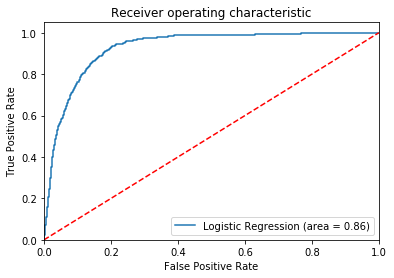

In [237]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

logit_roc_auc = roc_auc_score(y_test, clf_lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf_lr.predict_proba(X_test)[:,1])
plt.figure()

plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()